In [1]:
import numpy as np
import pandas as pd
import os as os

In [2]:
os.chdir('../')

In [3]:
%pylab inline
exec(open("./run_model.py").read())
exec(open("./get_signal_names.py").read())
exec(open("./portfolio_optimizer.py").read())

import datetime
from pylab import rcParams
import seaborn as sns
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [4]:
#sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'
#fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/'
#fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv'

sig_type = 'rank'
#rank
#norm
size_tag = '500_3000'
#0_3000
#0_500
#500_3000
sig_dir =      '../afp_data/' + sig_type + '/' +  size_tag + '/rps_data/'
fac_data_dir=  '../afp_data/' + sig_type + '/' +  size_tag + '/factor_exposure_data/'
fac_ret_file = '../afp_data/' + sig_type + '/' +  size_tag + '/fac_ret_file.csv'

    

In [5]:
use_pickle = True 

if use_pickle :
    file_name = '../afp_pickle/'+'sig_'+sig_type +'_'+size_tag +'.pkl' 
    sig_df = pd.read_pickle(file_name)
    #sig_df = pd.read_pickle('../afp_pickle/_rank_0_500.pkl')
else :
    sig_df = pd.DataFrame()
    sig_files = os.listdir(sig_dir)
    sig_files = np.sort(sig_files)



    for sig_file in sig_files :
        if '.csv' not in sig_file :
            continue
        print(sig_file)
        this_file = sig_dir + sig_file
        this_df = pd.read_csv(this_file, index_col = 'date')
        this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
        #this_df = this_df.sort_values(['mve'], ascending=False)
        #this_df = this_df.iloc[start_stock_ind:end_stock_ind,:]
        sig_df = sig_df.append(this_df)
    #data = sig_df.copy()

In [6]:


#model_name = 'pls_regression'
#train_model_arg = { 'n_components':20, 'scale':True, 'max_iter':5000, 'tol':1e-08, 'copy':True }



In [7]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [8]:
'res_ret' in sig_df.columns

True

In [9]:
#factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
factor_names =  ['beta']
sig_names = get_signal_names()
ret_sr = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)
sig_df = sig_df.drop(['idiovol'], axis=1)
ff_sig_df = sig_df[[ 'mve', 'bm', 'roic', 'agr', 'mom12m',]]

In [10]:
pm = PortfolioOptimizer(fac_data_dir=fac_data_dir,
                        fac_ret_file = fac_ret_file,
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )

--------


In [11]:
signs_dict = get_signal_signs()

signs_vec = []

for i in   sig_df.columns :
    signs_vec.append(signs_dict[i])
    
ff_signs_vec = []
for i in ff_sig_df.columns :
    ff_signs_vec.append(signs_dict[i])


In [12]:
file_name = '../afp_pickle/'+'pnl_'+sig_type +'_'+size_tag +'.pkl' 
pnl_df = pd.read_pickle(file_name)

In [13]:
#look_back = 6
#sample_decay = 0.5

In [14]:
model_name = 'huber_regression'
train_model_arg = None

signs_dict = get_signal_signs()

signs_vec = []

for i in   sig_df.columns :
    signs_vec.append(signs_dict[i])

sample_decay = 0.5    
look_back_vec = range(1,18,5)

hr_pnl_df = pd.DataFrame()
for look_back in look_back_vec:
    print(look_back)
    all_hr_sig_sr, all_hr_model_vec = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                              pred_model_arg ={},look_back=look_back, sample_decay = sample_decay, signs_vec=signs_vec)

    all_hr_pnl_sr = pm.run_signal(all_hr_sig_sr, neu_sig=True)
    hr_pnl_df[look_back] = all_hr_pnl_sr

1990-02-28 00:00:00
1990-03-30 00:00:00
1990-04-30 00:00:00
1990-05-31 00:00:00
1990-06-29 00:00:00
1990-07-31 00:00:00
1990-08-31 00:00:00
1990-09-28 00:00:00
1990-10-31 00:00:00
1990-11-30 00:00:00
1990-12-31 00:00:00
1991-01-31 00:00:00
1991-02-28 00:00:00
1991-03-28 00:00:00
1991-04-30 00:00:00
1991-05-31 00:00:00
1991-06-28 00:00:00
1991-07-31 00:00:00
1991-08-30 00:00:00
1991-09-30 00:00:00
1991-10-31 00:00:00
1991-11-29 00:00:00
1991-12-31 00:00:00
1992-01-31 00:00:00
1992-02-28 00:00:00
1992-03-31 00:00:00
1992-04-30 00:00:00
1992-05-29 00:00:00
1992-06-30 00:00:00
1992-07-31 00:00:00
1992-08-31 00:00:00
1992-09-30 00:00:00
1992-10-30 00:00:00
1992-11-30 00:00:00
1992-12-31 00:00:00
1993-01-29 00:00:00
1993-02-26 00:00:00
1993-03-31 00:00:00
1993-04-30 00:00:00
1993-05-28 00:00:00
1993-06-30 00:00:00
1993-07-30 00:00:00
1993-08-31 00:00:00
1993-09-30 00:00:00
1993-10-29 00:00:00
1993-11-30 00:00:00
1993-12-31 00:00:00
1994-01-31 00:00:00
1994-02-28 00:00:00
1994-03-31 00:00:00


In [15]:
# ir_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/knn_signals_1.csv')
# ir_df['abs_org'] = ir_df['org'].abs()
# ir_df = ir_df.sort_values('abs_org', ascending=False)

In [16]:

# for i in range( ir_df.shape[0] ):
#     print(ir_df.iloc[i,:])

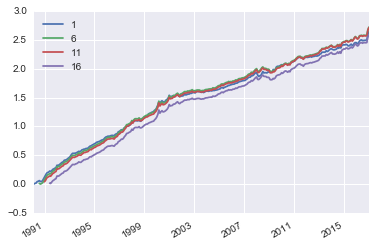

In [17]:
hr_pnl_df.cumsum().plot()

In [18]:
hr_pnl_df.mean()*sqrt(12)/hr_pnl_df.std()

1     1.928527
6     1.965024
11    1.970712
16    1.923427
dtype: float64